In [15]:
# Import required libraries
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Model
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.model_selection import train_test_split

In [46]:
from sklearn.model_selection import train_test_split
import os
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

# Load the image and RNA expression data
images = [image for image in os.listdir('data')]

In [50]:
# Load the image and RNA expression data
expression_data = pd.read_csv('df_train.csv')
expression_data['path'] = 'data/' + expression_data['path']
expression_data.head()

,CD79B,MAP2K3,IMPDH1,SLC16A3,MPZL3,APOBR,path
0,85.881503,72.668964,86.982548,71.567919,102.397177,56.153291,data/CoreID101.tif
1,84.038087,65.603926,85.122450,101.387886,100.845705,50.422852,data/CoreID102.tif
2,82.927907,70.431921,100.535887,130.071854,89.175900,52.823941,data/CoreID105.tif
3,93.960336,72.446053,92.204068,66.299116,74.202321,39.076962,data/CoreID107.tif
4,113.968536,73.458393,94.793735,49.152307,54.013524,28.627168,data/CoreID108.tif


In [51]:
# Separate the gene expression values from the other columns
expression_values = expression_data.iloc[:, 1:-1]

# Get the minimum and maximum values for each gene
min_values = expression_values.min(axis=0)
max_values = expression_values.max(axis=0)

# Shift the expression values so the minimum is zero
expression_values = expression_values - min_values

# Normalize each gene's expression values using Min-Max normalization
normalized_expression_values = expression_values / max_values

# Add the normalized values back to the original dataframe
expression_data.iloc[:, 1:-1] = normalized_expression_values

expression_data.head()

,CD79B,MAP2K3,IMPDH1,SLC16A3,MPZL3,APOBR,path
0,85.881503,0.245286,0.209623,0.081633,0.460839,0.515830,data/CoreID101.tif
1,84.038087,0.183260,0.199694,0.141156,0.450343,0.434784,data/CoreID102.tif
2,82.927907,0.225646,0.281969,0.198413,0.371402,0.468743,data/CoreID105.tif
3,93.960336,0.243329,0.237495,0.071116,0.270112,0.274317,data/CoreID107.tif
4,113.968536,0.252217,0.251318,0.036889,0.133543,0.126524,data/CoreID108.tif


In [52]:
# Define the CNN model
input_img = Input(shape=(128, 128, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)

In [53]:
# Define the FCN model
y = Dense(256, activation='relu')(x)
y = Dense(128, activation='relu')(y)
output = Dense(6, activation='linear')(y)

In [54]:
# Combine the CNN and FCN into a single model
model = Model(input_img, output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [55]:
# define the image data generator
datagen = ImageDataGenerator(rescale=1./255)

In [56]:
from sklearn.model_selection import train_test_split

# split the data into train and validation sets
train_df, val_df = train_test_split(expression_data, test_size=0.3, random_state=42)
#make test split
val_df, test_df = train_test_split(val_df, test_size=0.3, random_state=42)
print(model.metrics_names)

[]


In [57]:
# create the generators
train_gen = datagen.flow_from_dataframe(train_df,directory='', x_col='path', y_col=['CD79B', 'MAP2K3', 'IMPDH1', 'SLC16A3', 'MPZL3', 'APOBR'], target_size=(128, 128), class_mode='raw', batch_size=32)
val_gen = datagen.flow_from_dataframe(val_df,directory='', x_col='path', y_col=['CD79B', 'MAP2K3', 'IMPDH1', 'SLC16A3', 'MPZL3', 'APOBR'], target_size=(128, 128), class_mode='raw', batch_size=32)

history = model.fit_generator(train_gen, epochs=100, validation_data=val_gen)

Found 69 validated image filenames.
Found 21 validated image filenames.
Epoch 1/100


C:\Users\sathy\AppData\Local\Temp\ipykernel_14800\3710524361.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen, epochs=100, validation_data=val_gen)


3/3 [==============================] - 1s 164ms/step - loss: 1234.2380 - accuracy: 0.5362 - val_loss: 758.2899 - val_accuracy: 1.0000
Epoch 2/100
3/3 [==============================] - 0s 125ms/step - loss: 531.4330 - accuracy: 1.0000 - val_loss: 220.0271 - val_accuracy: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 125ms/step - loss: 154.8244 - accuracy: 1.0000 - val_loss: 534.6841 - val_accuracy: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 86ms/step - loss: 362.0620 - accuracy: 1.0000 - val_loss: 478.7694 - val_accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 125ms/step - loss: 170.2220 - accuracy: 1.0000 - val_loss: 176.6243 - val_accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 94ms/step - loss: 184.1277 - accuracy: 1.0000 - val_loss: 212.9443 - val_accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 86ms/step - loss: 147.2725 - accuracy: 1.0000 - val_loss: 199.6944 - val_accuracy: 1.0000

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [189]:
from keras.models import load_model
model.save('best_model.h5')
model = load_model('best_model.h5')

In [190]:
#run the model on the test data
test_df.head()

,CD79B,MAP2K3,IMPDH1,SLC16A3,MPZL3,APOBR,path
81,86.164008,0.297625,0.177607,0.066595,0.408359,0.281017,data/CoreID73.tif
4,113.968536,0.252217,0.251318,0.036889,0.133543,0.126524,data/CoreID108.tif
15,78.946055,0.125502,0.095834,0.055123,0.387049,0.399921,data/CoreID127.tif
12,58.555570,0.292739,0.162070,0.029685,0.208280,0.089717,data/CoreID124.tif
10,119.713611,0.441251,0.196799,0.221892,0.190675,0.126524,data/CoreID122.tif


In [191]:
test_df['path'] = test_df['path']
test_gen = datagen.flow_from_dataframe(test_df,directory='', x_col='path', y_col=['CD79B', 'MAP2K3', 'IMPDH1', 'SLC16A3', 'MPZL3', 'APOBR'], target_size=(128, 128), class_mode='raw', batch_size=1)

Found 9 validated image filenames.


In [192]:
#calculate r^2
from sklearn.metrics import r2_score
import numpy as np
r2 = []
y_arr = []
pred_arr = []
for i in range(0, len(test_df)):
    x, y = test_gen.next()
    y_arr.append(y)
    pred_arr.append(model.predict(x)[0])
    r2.append(r2_score(y[0], model.predict(x)[0]))
print('mean r2 = {}'.format(np.mean(r2)))

1/1 [==============================] - 0s 15ms/step
mean r2 = 0.9470624389594408


In [186]:
ind = 0
gt_array = []

for i in range(0, len(test_df)):
    x, y = test_gen.next()
    gt = y[0][0]
    print(gt)
    pred1 = model.predict(x)[0][0]
    print(pred1)
    r2_score_1 = r2_score(gt, pred1)
    print("ground truth: {} \npredicted: {} \nr2: {}".format(gt, pred1[0], r2_score_1))

78.94605547374772
1/1 [==============================] - 0s 16ms/step
85.81469


TypeError: Singleton array 78.94605547374772 cannot be considered a valid collection.

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 16ms/step
[ 8.5814690e+01 -2.1845789e-01  2.0823295e-01  6.4203031e-02
  6.5609521e-01  6.3410050e-01]
1/1 [==============================] - 0s 16ms/step
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 9ms/step
[88.89362    -0.17163678  0.23897941  0.13222003  0.6218297   0.6827522 ]
1/1 [==============================] - 0s 16ms/step
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 17ms/step
[ 9.4951576e+01 -1.8526979e-01  3.2924852e-01  2.0863302e-02
  6.3742799e-01  6.5715939e-01]
1/1 [==============================] - 0s 16ms/step
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 10ms/step
[ 9.3335289e+01 -2.5993034e-01  3.1444177e-01 -2.9175989e-02
  6.5794724e-01  6.1007267e-01]
1/1 [==============================] - 0s 13ms/step
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 16ms/step
[88.89362    -0.17163678  0.23897941  0.13222003  0.6218297 

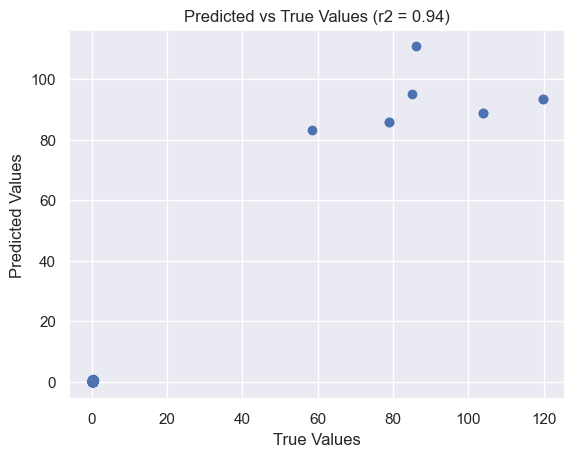

In [97]:
import matplotlib.pyplot as plt

# Calculate the mean r2 score
r2 = []
y_arr = []
pred_arr = []
for i in range(0, len(test_df)):
    x, y = test_gen.next()
    print(type(x))
    y_arr.append(y[0])
    pred_arr.append(model.predict(x)[0])
    print(model.predict(x)[0])
    r2.append(r2_score(y[0], model.predict(x)[0]))
mean_r2 = np.mean(r2)

# Plot the points
plt.scatter(y_arr, pred_arr)

# Add a title and labels to the plot
plt.title('Predicted vs True Values (r2 = {:.2f})'.format(mean_r2))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Show the plot
plt.show()

In [94]:
# run inference on random picture
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model
import os
import pandas as pd
import cv2

In [95]:
#load the model
model = load_model('model.h5')

In [113]:
image_path = '../data/webscraped_labeled/primary0.jpg'

In [114]:
# Load the image
image = cv2.imread(image_path)

# Resize the image to the expected size
expected_size = (128, 128
                 )
image = cv2.resize(image, expected_size)

# Preprocess the image
preprocessed_image = image / 255.

# Add an extra dimension to represent the batch size
preprocessed_image = np.expand_dims(preprocessed_image, axis=0)

# Run the image through the model
prediction = model.predict(preprocessed_image)
print(prediction)

1/1 [==============================] - 0s 16ms/step
[[8.9968262e+01 7.9614438e-02 1.9021995e-01 4.5177341e-01 6.3199395e-01
  8.9704996e-01]]
